In [1]:
from cntools.datasets import Dataset
import statsmodels.api as sm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import sys
from general import cns_remap
import os
sys.path.insert(0, '..')
plt.rcParams["font.family"] = 'Arial'

In [2]:
patient_col = 'Sample'
image_col = 'Image'
neigh_col = 'CN'
ct_col = 'CT'

In [3]:
# CRC:

cells = ['Treg-PD-1+', 'Treg-Ki67+', 'Treg-ICOS+', 'CD8+PD-1+', 'CD8+Ki67+', 'CD8+ICOS+', 'CD4+PD-1+', 'CD4+Ki67+', 'CD4+ICOS+', 'Macs-PD-1+', 'Macs-Ki67+', 'Macs-ICOS+']
group_id = {'CLR': 0, 'DII': 1}

# Uncomment one of these results on CRC

# ds = pickle.load(open('../data/CRC/CRC_ds_ori.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df_ori.csv')
# out_dir = '../analysis_res/CRC/CC_ori'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC_ori/cns.pkl', 'rb')), [0, 9, 1, 2, 3, 4, 5, 6, 7, 8])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Vascularized smooth muscle', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CC'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CC/cns_n_cns=9_m=10_naive.pkl', 'rb')), [1, 2, 6, 4, 7, 5, 3, 8, 0])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/CF-IDF'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/CF-IDF/cns_n_cns=9_eps=32_r=0.8_naive.pkl', 'rb')), [3, 4, 7, 8, 0, 5, 6, 2, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Undefined cell enriched', 'CN-7: Immune cell / vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
df = pd.read_csv('../data/CRC/CRC_df.csv')
out_dir = '../analysis_res/CRC/CNE'
nbs = [0, 1, 2, 3, 5, 6, 7, 8]
cns = cns_remap(pickle.load(open('../cn/CRC/CNE/cns_n_cns=9_perp=15_lam=0.25_naive.pkl', 'rb')), [2, 3, 7, 1, 8, 5, 6, 0, 4])
ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune. stroma & vasc.', 'CN-4: Macrophage enriched', 'CN-5: Follicle', 'CN-6: Immune cell enriched', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/Spatial LDA'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/Spatial LDA/cns_n_cns=9_eps=50_b=0.025_naive.pkl', 'rb')), [8, 2, 4, 0, 7, 6, 5, 3, 1])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Immune-infiltrated stroma', 'CN-4: T cell & macrophage enriched', 'CN-5: Follicle', 'CN-6: Undefined cell enriched', 'CN-7: Macrophage, plasma cell & vasc. enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/ClusterNet'
# nbs = [0, 1, 2, 3, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/ClusterNet/6first_16_70.0_naive.pkl', 'rb')), [8, 1, 3, 5, 0, 4, 2, 7, 6])
# ind = ['CN-1: T cell enriched', 'CN-2: Bulk tumor', 'CN-3: Macrophage & stroma enriched', 'CN-4: Macrophage & vasc. enriched', 'CN-5: Follicle', 'CN-6: Tumor boundry', 'CN-7: Plasma cell enriched', 'CN-8: Smooth muscle', 'CN-9: Granulocyte enriched']

# ds = pickle.load(open('../data/CRC/CRC_ds.pkl', 'rb'))
# df = pd.read_csv('../data/CRC/CRC_df.csv')
# out_dir = '../analysis_res/CRC/GAP'
# nbs = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# cns = cns_remap(pickle.load(open('../cn/CRC/GAP/6first_labels_naive.pkl', 'rb')), [3, 0, 5, 2, 7, 6, 8, 1, 4])
# ind = ['CN-1: Mixed', 'CN-2: Bulk tumor & B cell enriched', 'CN-3: Mixed', 'CN-4: Macrophage enriched', 'CN-5: Mixed', 'CN-6: Tumor boundary', 'CN-7: Tumor boundary', 'CN-8: Mixed', 'CN-9: Mixed']


# T2D:

# ds = pickle.load(open('../data/T2D/T2D_ds.pkl', 'rb'))
# df = pd.read_csv('../data/T2D/T2D_df.csv')
# cells = ds.ct_order
# df_cells = np.zeros((len(df), len(cells)), dtype='int')
# df_cells[[i for i in range(len(df))], [cells.index(i) for i in df[ct_col]]] = 1
# df[cells] = df_cells

# group_id = {'ND': 0, 'T2D': 1}
# nbs = [0, 1, 2, 3, 4, 5]

# Uncomment one of these results on T2D

# out_dir = '../analysis_res/T2D/CF-IDF_ori'
# cns = pickle.load(open('../cn/T2D/CF-IDF_ori/cns.pkl', 'rb'))
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/CC'
# cns = cns_remap(pickle.load(open('../cn/T2D/CC/cns_n_cns=6_m=5_hmrf.pkl', 'rb')), [1, 4, 0, 2, 5, 3])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta, gamma &\nmacrophage cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Alpha & mixed cell enriched']

# out_dir = '../analysis_res/T2D/CF-IDF'
# cns = cns_remap(pickle.load(open('../cn/T2D/CF-IDF/cns_n_cns=6_eps=57_r=0.5_naive.pkl', 'rb')), [0, 1, 5, 3, 4, 2])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: T cell enriched', 'CN-5: Other immune cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/CNE'
# cns = cns_remap(pickle.load(open('../cn/T2D/CNE/cns_n_cns=6_perp=15_lam=0.25_naive.pkl', 'rb')), [3, 1, 4, 2, 0, 5])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/Spatial LDA'
# cns = cns_remap(pickle.load(open('../cn/T2D/Spatial LDA/cns_n_cns=6_eps=100_b=0.25_naive.pkl', 'rb')), [2, 1, 0, 4, 3, 5])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Gamma cell enriched', 'CN-6: Alpha, macrophage &\nendothelial cell enriched']

# out_dir = '../analysis_res/T2D/ClusterNet'
# cns = cns_remap(pickle.load(open('../cn/T2D/ClusterNet/6first_16_70.0_hmrf.pkl', 'rb')), [1, 2, 0, 3, 5, 4])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Beta & endothelial cell enriched', 'CN-4: Delta cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Macrophage enriched']

# out_dir = '../analysis_res/T2D/GAP'
# cns = cns_remap(pickle.load(open('../cn/T2D/GAP/6first_labels_hmrf.pkl', 'rb')), [0, 2, 4, 5, 3, 1])
# ind = ['CN-1: Alpha cell enriched', 'CN-2: Beta cell enriched', 'CN-3: Alpha & mixed cell enriched', 'CN-4: Alpha cell enriched', 'CN-5: Alpha & beta cell enriched', 'CN-6: Macrophage enriched']


ind = [i.split(': ')[1] for i in ind]

In [4]:
sample2group = dict(sorted(ds.sample2group.items()))
patients = sample2group.keys()
group = [group_id[g] for g in sample2group.values()]
group = pd.Series(group)

In [5]:
df[neigh_col] = 0
for sample, df_sample in df.groupby(patient_col, sort=False):
    for image, df_image in df_sample.groupby(image_col, sort=False):
        df.loc[df_image.index, neigh_col] = cns[sample][image]
cells2 = pd.DataFrame(df, columns=cells + [neigh_col, patient_col, ct_col])
cells2

,Treg-PD-1+,Treg-Ki67+,Treg-ICOS+,CD8+PD-1+,CD8+Ki67+,CD8+ICOS+,CD4+PD-1+,CD4+Ki67+,CD4+ICOS+,Macs-PD-1+,Macs-Ki67+,Macs-ICOS+,CN,Sample,CT
0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Granulocytes
1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,Granulocytes
2,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Granulocytes
3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Granulocytes
4,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Granulocytes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251023,0,0,0,0,0,0,0,0,0,0,0,0,4,29,CD3+ T cells
251024,0,0,0,0,0,0,1,0,0,0,0,0,2,30,CD3+ T cells
251025,0,0,0,0,0,0,0,0,0,0,0,0,0,31,CD3+ T cells
251026,0,0,0,0,0,0,0,0,0,0,0,0,3,34,CD3+ T cells


In [6]:
nbd_counts = cells2.groupby([patient_col, neigh_col]).size().unstack().fillna(0).loc[patients]
pat_counts = cells2.groupby([patient_col]).size().fillna(0).loc[patients]

In [7]:
'''
preparing dataframes (best to do this on your data):
all_freqs should have cols patient, neighborhood, cell types, giving
the frequency of cells of that type in that neighborhood in that patient
'''
all_freqs = cells2.groupby([patient_col, neigh_col])[cells].sum().reset_index()
for p in patients:
    for cn in nbs:
        if len(all_freqs[(all_freqs[patient_col] == p) & (all_freqs[neigh_col] == cn)]) == 0:
            all_freqs = all_freqs.append({patient_col: p, neigh_col: cn}, ignore_index=True).fillna(0)
all_freqs = all_freqs.sort_values(by=[patient_col, neigh_col]).reset_index(drop=True)

/var/folders/hs/ljx_n2857y7g_lhq6hrr4dlw0000gn/T/ipykernel_1857/1008681264.py:10: RuntimeWarning: invalid value encountered in true_divide
  arr = arr / cells2.groupby([patient_col,neigh_col]).size().unstack().fillna(0)[nb].values[:, None]
/var/folders/hs/ljx_n2857y7g_lhq6hrr4dlw0000gn/T/ipykernel_1857/1008681264.py:10: RuntimeWarning: invalid value encountered in true_divide
  arr = arr / cells2.groupby([patient_col,neigh_col]).size().unstack().fillna(0)[nb].values[:, None]
/var/folders/hs/ljx_n2857y7g_lhq6hrr4dlw0000gn/T/ipykernel_1857/1008681264.py:10: RuntimeWarning: invalid value encountered in true_divide
  arr = arr / cells2.groupby([patient_col,neigh_col]).size().unstack().fillna(0)[nb].values[:, None]


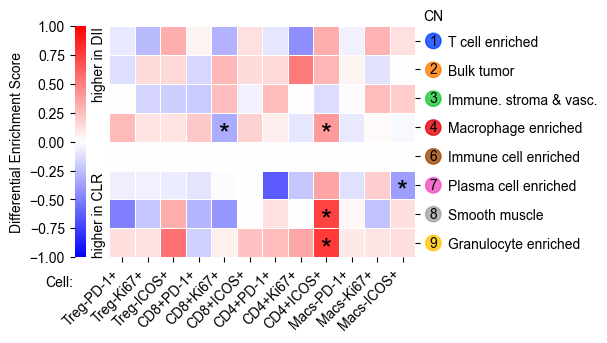

In [9]:
chks = cells
x = all_freqs.reset_index().iloc[:,1:]
x = x.loc[x[neigh_col].isin(nbs),:]
totals = x.groupby(patient_col).apply(lambda x: x.sum(axis = 0))
X_chk_overall =np.log(1e-3+ pd.DataFrame(np.stack([totals[chk].values/pat_counts.values for chk in chks]).T, columns=chks))

df_list = []
for nb in nbs:
    arr = x.loc[x[neigh_col]==nb,:].set_index(patient_col).loc[patients,chks].values
    arr = arr / cells2.groupby([patient_col,neigh_col]).size().unstack().fillna(0)[nb].values[:, None]
    df_list.append(pd.DataFrame(arr, index = patients, columns = [chk+'_'+str(nb) for chk in chks]))

X_density = pd.concat(df_list, axis = 1)

X_density = np.log(1e-3+X_density.loc[:, X_density.apply(np.std,axis = 0)>0])

changes = {}
for col in X_chk_overall.columns:
    for nb in nbs:
        X = pd.concat([X_chk_overall[col], group.astype('int'),pd.Series(np.ones(len(group)), index = group.index.values)],axis = 1).values
        if col+'_%d'%nb in X_density.columns:
            Y = X_density[col+'_%d'%nb].values
            X = X[~pd.isna(Y)]
            Y = Y[~pd.isna(Y)]
            results = sm.OLS(Y,X).fit()
            changes[(col,nb)] = (results.pvalues[1], results.params[1])

dat = (pd.DataFrame(changes).loc[1].unstack())
dat = pd.DataFrame(np.nan_to_num(dat.values), index=dat.index, columns=[ind[nb] for nb in dat.columns]).T.loc[:, chks]
pvals = (pd.DataFrame(changes).loc[0].unstack()).T.sort_index(ascending=True).loc[:, chks]


#this is where you should correct pvalues for multiple testing 


#plot as heatmap
plt.figure(figsize=(5, 3))

ax = sns.heatmap(dat, cmap='bwr', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={'location': 'left', 'label': 'Differential Enrichment Score', 'pad': 0.06}) # 'pad': 0.05
ax.yaxis.set_ticks_position('right')
ax.tick_params(axis='y', labelrotation=0)
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='y', pad=20)
for i,k in enumerate(nbs):
    ax.annotate(f'{k+1}', (len(cells)+0.55, i+0.65), bbox={'boxstyle': 'circle', 'color': sns.color_palette('bright')[k], 'pad': 0.05, 'alpha': 0.8}, annotation_clip=False)
ax.annotate('CN', (len(cells)+0.3, -0.2), annotation_clip=False)
ax.annotate('Cell:', (-2.5, len(nbs)+1), annotation_clip=False)

ax2 = ax.collections[0].colorbar.ax

ax3 = ax2.secondary_yaxis('right')
ax3.spines['right'].set_visible(False)
ax3.set_yticks([1])
ax3.set_yticklabels([f'higher in {list(group_id.keys())[1]}'], rotation=90, va='top')
ax3.tick_params(right=False, pad=0.8)

ax4 = ax2.secondary_yaxis('right')
ax4.spines['right'].set_visible(False)
ax4.set_yticks([-1])
ax4.set_yticklabels([f'higher in {list(group_id.keys())[0]}'], rotation=90, va='bottom')
ax4.tick_params(right=False, pad=0.8)

for b, a in zip(*np.where(pvals<0.05)):
    hh = plt.text(a+.47, b+.75, '*', fontsize=20, ha='center', va='center') # (0.47, 0.75), (0.5, 0.65)

plt.savefig(os.path.join(out_dir, 'diff.pdf'), bbox_inches='tight')